In [19]:
%matplotlib inline

# Crear función reutilizable para graficar

In [20]:
from matplotlib import pyplot
from numpy.random import seed
from numpy.random import randn
import pandas as pd
from scipy.stats import anderson, normaltest, shapiro


def shapiro_test(data):
    """Shapiro-Wilk Test"""
    # normality test
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.6f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('La muestra parece ser normal (No se rechaza la hipótesis nula H0)')
    else:
        print('La muestra parece no ser normal (Rechazar hipótesis nula H0)')

def agostino_test(data):
    # normality test
    stat, p = normaltest(data)
    print('Statistics=%.3f, p=%.6f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('La muestra parece ser normal (No se rechaza la hipótesis nula H0)')
    else:
        print('La muestra parece no ser normal (Rechazar hipótesis nula H0)')
    
def anderson_test(data):
    # normality test
    result = anderson(data)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, la muestra parece ser normal (No se rechaza la hipótesis nula H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, la muestra parece no ser normal (Rechazar hipótesis nula H0)' % (sl, cv))

        
def graficar(data):
    fig, (ax1, ax2) = pyplot.subplots(2)
    fig.suptitle('Pruebas visuales de normalidad')
    ax1.plot(data.diff())
    ax1.set_title("Gráfica de diferencias")
    ax1.set_xlabel("a")
    ax1.set_ylabel("b")
    ax2.hist(data)
    ax2.set_xlabel("Histograma")
    #ax2.set_ylabel("")
    #plt.tight_layout()
    

def prueba_de_normalidad(data):
    shapiro_test(data)
    print('')
    agostino_test(data)
    print('')
    anderson_test(data)
    print('')
    graficar(data)



# Pruebas de normalidad

Las pruebas de normalidad que se realizarán serán:

- Shapiro-Wilk
- D’Agostino’s K^2
- Anderson-Darling

También graficaremos el histograma para ayudar a entender mejor de manera cualitativa si una muestra es normal o no por inspección visual. La prueba de noramlidad no se realizará sobre la serie de tiempo, sino sobre la diferencia del elemento anterior de la serie de tiempo


[Brownlee, J. (2018). A Gentle Introduction to Normality Tests in Python. Retrieved 21 March 2021, from https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

In [21]:
data1=pd.read_csv('../data/examples/example_wp_log_peyton_manning.csv')

# 1 Peyton Manning

Serie de tiempo de el número de vistas de la página de Wikipedia de Peyton Manning. Originalmente se utilizó el paquete Wikipediatrend de R. Esto provee un ejemplo muy claro de las características de prophet como múltiple estacionalidad, tasas cambiantes, y la habilidad del modelo para los días especiales (es decir los días de playoff o superbowl).

Statistics=0.908, p=0.000000
La muestra parece no ser normal (Rechazar hipótesis nula H0)

Statistics=561.966, p=0.000000
La muestra parece no ser normal (Rechazar hipótesis nula H0)

Statistic: 76.112
15.000: 0.575, la muestra parece no ser normal (Rechazar hipótesis nula H0)
10.000: 0.655, la muestra parece no ser normal (Rechazar hipótesis nula H0)
5.000: 0.786, la muestra parece no ser normal (Rechazar hipótesis nula H0)
2.500: 0.917, la muestra parece no ser normal (Rechazar hipótesis nula H0)
1.000: 1.091, la muestra parece no ser normal (Rechazar hipótesis nula H0)



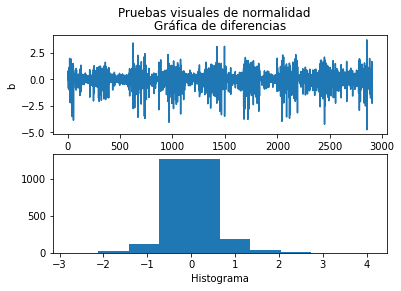

In [22]:
results=prueba_de_normalidad(data1["y"].diff().dropna())

## Filtro lineal. Promdio móvil

Aquí graficaremos la serie de tiempo suavizada (arriba), tomando como ventana en este caso 10% del total del tamaño de la serie. La serie de diferencias la tenemos debajo.

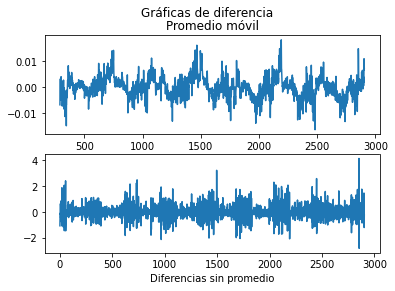

In [23]:
fig, (ax1, ax2) = pyplot.subplots(2)
fig.suptitle('Gráficas de diferencia')
ax1.plot(data1["y"].diff().rolling(int(len(data1)/10)).mean().dropna())
ax1.set_title("Promedio móvil")
ax2.set_xlabel("Diferencias sin promedio")
ax2.plot(data1["y"].diff())


# 2

La serie de tiempo del número de pasajeros aereos es un ejemplo cuando la estacionalidad aditiva no funciona. 

In [24]:
data2=pd.read_csv('../data/examples/example_air_passengers.csv')

Statistics=0.986, p=0.146864
La muestra parece ser normal (No se rechaza la hipótesis nula H0)

Statistics=5.194, p=0.074481
La muestra parece ser normal (No se rechaza la hipótesis nula H0)

Statistic: 0.469
15.000: 0.561, la muestra parece ser normal (No se rechaza la hipótesis nula H0)
10.000: 0.639, la muestra parece ser normal (No se rechaza la hipótesis nula H0)
5.000: 0.766, la muestra parece ser normal (No se rechaza la hipótesis nula H0)
2.500: 0.894, la muestra parece ser normal (No se rechaza la hipótesis nula H0)
1.000: 1.064, la muestra parece ser normal (No se rechaza la hipótesis nula H0)



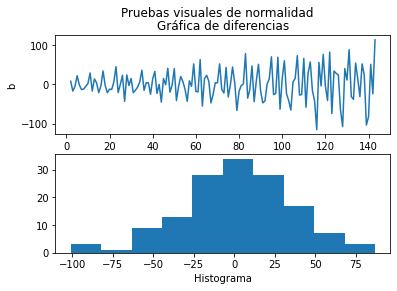

In [25]:
results=prueba_de_normalidad(data2["y"].diff().dropna())

## Filtro lineal. Promdio móvil

Aquí graficaremos la serie de tiempo suavizada (arriba), tomando como ventana en este caso 50% del total del tamaño de la serie. La serie de diferencias la tenemos debajo.

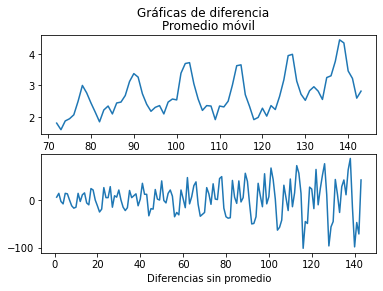

In [26]:
fig, (ax1, ax2) = pyplot.subplots(2)
fig.suptitle('Gráficas de diferencia')
ax1.plot(data2["y"].diff().rolling(int(len(data2)/2)).mean().dropna())
ax1.set_title("Promedio móvil")
ax2.set_xlabel("Diferencias sin promedio")
ax2.plot(data2["y"].diff())


# 3

Ventas mensuales

In [27]:
data3=pd.read_csv('../data/examples/example_retail_sales.csv')

Statistics=0.898, p=0.000000
La muestra parece no ser normal (Rechazar hipótesis nula H0)

Statistics=56.220, p=0.000000
La muestra parece no ser normal (Rechazar hipótesis nula H0)

Statistic: 10.660
15.000: 0.568, la muestra parece no ser normal (Rechazar hipótesis nula H0)
10.000: 0.647, la muestra parece no ser normal (Rechazar hipótesis nula H0)
5.000: 0.777, la muestra parece no ser normal (Rechazar hipótesis nula H0)
2.500: 0.906, la muestra parece no ser normal (Rechazar hipótesis nula H0)
1.000: 1.078, la muestra parece no ser normal (Rechazar hipótesis nula H0)



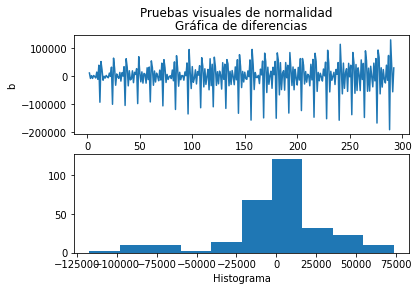

In [28]:
results=prueba_de_normalidad(data3["y"].diff().dropna())

## Suavizando para lograr la normalidad


Resulta que en ocasiones las series son casi normales y aplicando un filtro lineal como puede ser el promedio móvil, podemos lograr la normalidad. Decidimos graficar el p-value de la prueba Shapiro contra diversas ventanas que representan el porcentaje de la ventana con respecto al total de los puntos. Resulta que al tomar una ventana de aproximadamente 18% logramos un p-value de 0.12.

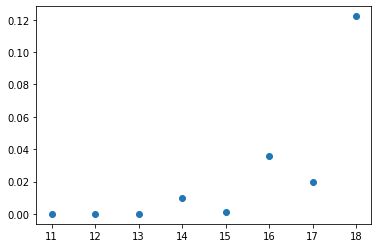

In [29]:
import matplotlib.pyplot as plt
testList2=[(x,shapiro(data3["y"].diff().rolling(int(len(data3)/x)).mean().dropna()).pvalue) for x in range(11,19) ]
plt.scatter(*zip(*testList2))
plt.show()

Utilizando el valor p descubierto, podemos volver a intentar la prueba de normalidad, y vemos que pasa absolutamente todas las pruebas. 

Statistics=0.992, p=0.122158
La muestra parece ser normal (No se rechaza la hipótesis nula H0)

Statistics=1.006, p=0.604731
La muestra parece ser normal (No se rechaza la hipótesis nula H0)

Statistic: 0.485
15.000: 0.568, la muestra parece ser normal (No se rechaza la hipótesis nula H0)
10.000: 0.647, la muestra parece ser normal (No se rechaza la hipótesis nula H0)
5.000: 0.776, la muestra parece ser normal (No se rechaza la hipótesis nula H0)
2.500: 0.905, la muestra parece ser normal (No se rechaza la hipótesis nula H0)
1.000: 1.077, la muestra parece ser normal (No se rechaza la hipótesis nula H0)



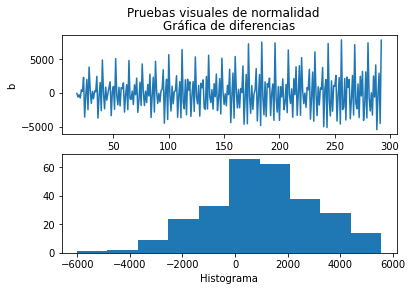

In [30]:
prueba_de_normalidad(data3["y"].diff().rolling(int(len(data3)/18)).mean().dropna())

# 4

Vemos aquí el creciemiento de las ventas como función del tiempo

In [31]:
data4=pd.read_csv('../data/examples/example_wp_log_R.csv')

Statistics=0.938, p=0.000000
La muestra parece no ser normal (Rechazar hipótesis nula H0)

Statistics=378.096, p=0.000000
La muestra parece no ser normal (Rechazar hipótesis nula H0)

Statistic: 39.243
15.000: 0.575, la muestra parece no ser normal (Rechazar hipótesis nula H0)
10.000: 0.655, la muestra parece no ser normal (Rechazar hipótesis nula H0)
5.000: 0.786, la muestra parece no ser normal (Rechazar hipótesis nula H0)
2.500: 0.917, la muestra parece no ser normal (Rechazar hipótesis nula H0)
1.000: 1.090, la muestra parece no ser normal (Rechazar hipótesis nula H0)



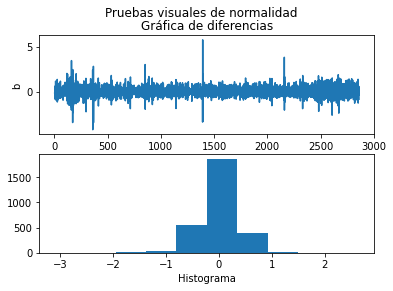

In [32]:
results=prueba_de_normalidad(data4["y"].diff().dropna())

# Filtro lineal. Promdio móvil

Aquí graficaremos la serie de tiempo suavizada (arriba), tomando como ventana en este caso 10% del total del tamaño de la serie. La serie de diferencias la tenemos debajo.

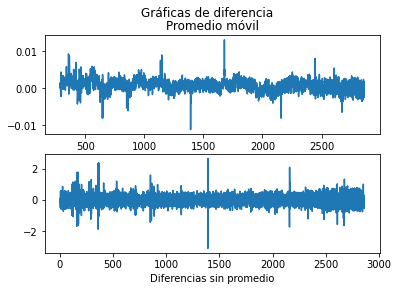

In [33]:
fig, (ax1, ax2) = pyplot.subplots(2)
fig.suptitle('Gráficas de diferencia')
ax1.plot(data4["y"].diff().rolling(int(len(data4)/10)).mean().dropna())
ax1.set_title("Promedio móvil")
ax2.set_xlabel("Diferencias sin promedio")
ax2.plot(data4["y"].diff())


# 5  

Aquí tenemos datos con resolución de 5 minutos (temperatura diaria en Yosemite).

In [34]:
data5=pd.read_csv('../data/examples/example_yosemite_temps.csv')

Statistics=0.754, p=0.000000
La muestra parece no ser normal (Rechazar hipótesis nula H0)

Statistics=4633.383, p=0.000000
La muestra parece no ser normal (Rechazar hipótesis nula H0)

Statistic: 1044.562
15.000: 0.576, la muestra parece no ser normal (Rechazar hipótesis nula H0)
10.000: 0.656, la muestra parece no ser normal (Rechazar hipótesis nula H0)
5.000: 0.787, la muestra parece no ser normal (Rechazar hipótesis nula H0)
2.500: 0.918, la muestra parece no ser normal (Rechazar hipótesis nula H0)
1.000: 1.092, la muestra parece no ser normal (Rechazar hipótesis nula H0)



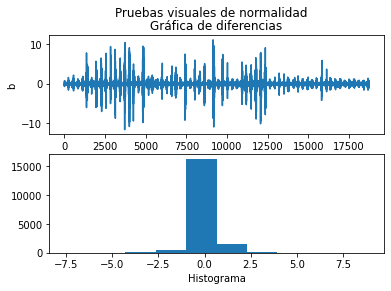

In [35]:
results=prueba_de_normalidad(data5["y"].diff().dropna())

## Filtro lineal. Promdio móvil

Aquí graficaremos la serie de tiempo suavizada (arriba), tomando como ventana en este caso 50% del total del tamaño de la serie. La serie de diferencias la tenemos debajo.

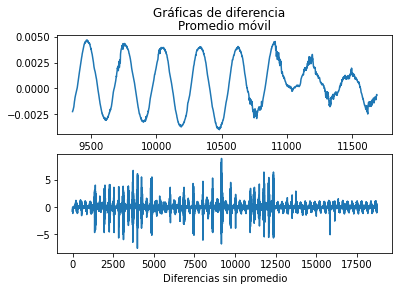

In [36]:
fig, (ax1, ax2) = pyplot.subplots(2)
fig.suptitle('Gráficas de diferencia')
ax1.plot(data5["y"].diff().rolling(int(len(data5)/2)).mean().dropna())
ax1.set_title("Promedio móvil")
ax2.set_xlabel("Diferencias sin promedio")
ax2.plot(data5["y"].diff())

